<a href="https://colab.research.google.com/github/Vibertexs/Tensorflow-Projects/blob/main/Parkinson_Prediction_Using_Hand_Drawing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This was my attempt at continusely trying to solve a problem. Although it took a long time, we finally came to a solution.

# Introduction

Introduction
What is Parkinson's Disease?

Parkinson's disease (PD), or simply Parkinson's is a long-term degenerative disorder of the central nervous system that mainly affects the motor system. The symptoms usually emerge slowly and, as the disease worsens, non-motor symptoms become more common. The most obvious early symptoms are tremor, rigidity, slowness of movement, and difficulty with walking,but cognitive and behavioral problems may also occur. Parkinson's disease dementia becomes common in the advanced stages of the disease. Depression and anxiety are also common, occurring in more than a third of people with PD. Other symptoms include sensory, sleep, and emotional problems. The main motor symptoms are collectively called "parkinsonism", or a "parkinsonian syndrome


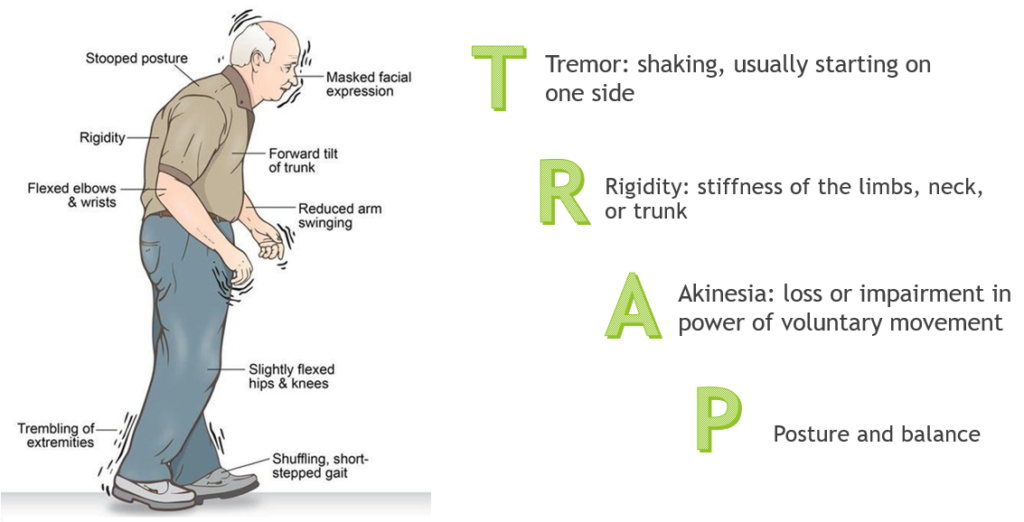





While Parkinson’s disease cannot be cured, early detection along with proper medication can significantly improve symptoms and quality of life, making it an important topic for research especially in the creation of new diagnostic tools.

A 2017 study by Zham et al. found that it was possible to detect Parkinson’s by asking the patient to draw a spiral and then track:

Speed of drawing
Pen pressure
The researchers found that the drawing speed was slower and the pen pressure lower among Parkinson’s patients — this was especially pronounced for patients with a more acute/advanced forms of the disease.

We’ll be leveraging the fact that two of the most common Parkinson’s symptoms include tremors and muscle rigidity which directly impact the visual appearance of a hand drawn spiral and wave.

The variation in visual appearance will enable us to train a computer vision + machine learning algorithm to automatically detect Parkinson’s disease.

Notes

Using binary class gives the error of ```ValueError: logits and labels must have the same shape ((None, 2) vs (None, 1))```

The spiral data and the wave data are different sizes
* Wave Images Shape: 512x290
* Spiral Images Shape: 256x256

CNN doesn't seem to work we could try Logistic regression and PCAs

Resources and code inspiration

https://www.kaggle.com/basel99/parkinson-s-disease-detection

https://www.kaggle.com/vibs26031998/predicting-parkinson 

https://medium.com/@gryangalario/image-classification-using-logistic-regression-on-the-american-sign-language-mnist-9c6522242ddf

https://www.mtu.edu/flex/operations/levels/

# Attempt 8

In [ ]:
for i in range(2):
    !echo '{"username":"vibertexyt","key":"c0d8eb6afe698fbdf81a814c150a3f20"}' > /root/.kaggle/kaggle.json
    !kaggle datasets download -d kmader/parkinsons-drawings

In [ ]:
!unzip /content/parkinsons-drawings.zip

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow import keras
from keras import Sequential
import PIL
import PIL.Image
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

import cv2 as cv
from google.colab.patches import cv2_imshow
print(cv.__version__)

4.1.2


In [ ]:
train_dir = "/content/wave/training" 
train_output_dir = "./resize_image/train"
BATCH_SIZE = 32
img_height = 128
img_width = 73
EPOCHS = 100

In [ ]:
import os
import cv2
import numpy as np
from skimage import feature
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def quantify_image(image):
    features = feature.hog(image, orientations=9,
                           pixels_per_cell=(10, 10), cells_per_block=(2, 2),
                           transform_sqrt=True, block_norm="L1")
    return features


In [ ]:
def load_split(path):
    # grab the list of images in the input directory, then initialize
    # the list of data (i.e., images) and class labels
    imagePaths = list(paths.list_images(path))
    data = []
    labels = []
    # loop over the image paths
    for imagePath in imagePaths:
        # extract the class label from the filename
        label = imagePath.split(os.path.sep)[-2]
        # load the input image, convert it to grayscale, and resize
        # it to 200x200 pixels, ignoring aspect ratio
        image = cv2.imread(imagePath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (200, 200))
        # threshold the image such that the drawing appears as white
        # on a black background
        image = cv2.threshold(image, 0, 255,
                              cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        # quantify the image
        features = quantify_image(image)
        # update the data and labels lists, respectively
        data.append(features)
        labels.append(label)
    return (np.array(data), np.array(labels))


In [ ]:
!pip install imutils
from imutils import paths
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
def train_models(dataset):
    # initialize the models
    models = {
        "Rf": {
            "classifier": RandomForestClassifier(random_state=1),
            "accuracy": 0,
            "sensitivity": 0,
            "specificity": 0,
        },
        "Xgb": {
            "classifier": XGBClassifier(),
            "accuracy": 0,
            "sensitivity": 0,
            "specificity": 0,
        }
    }
    # define the path to the testing and training directories
    path = "/content/" + dataset
    trainingPath = os.path.sep.join([path, "training"])
    testingPath = os.path.sep.join([path, "testing"])
    # load the data
    (trainX, trainY) = load_split(trainingPath)
    (testX, testY) = load_split(testingPath)
    # encode the labels
    le = LabelEncoder()
    trainY = le.fit_transform(trainY)
    testY = le.transform(testY)

    # train each model and calculate its metrics
    for model in models:
        models[model]["classifier"].fit(trainX, trainY)
        predictions = models[model]["classifier"].predict(testX)
        cm = confusion_matrix(testY, predictions).ravel()
        tn, fp, fn, tp = cm
        models[model]["accuracy"] = (tp + tn) / float(cm.sum())
        models[model]["sensitivity"] = tp / float(tp + fn)
        models[model]["specificity"] = tn / float(tn + fp)

    return models

In [ ]:
# Train the models on the spiral drawings
spiralModels = train_models('spiral')

In [ ]:
# train the model on the wave-form drawings
waveModels = train_models('wave')

In [ ]:
print("Random Forrest vs XGBoost Classifier\n\n")
for metric in ("accuracy", "sensitivity", "specificity"):
    print(f"{metric.capitalize()}: ")
    print("Random Forrest={:.2f}%, XGBoost={:.2f}% \n".format(
        spiralModels['Rf'][metric]*100, spiralModels['Xgb'][metric]*100))

Random Forrest vs XGBoost Classifier


Accuracy: 
Random Forrest=83.33%, XGBoost=73.33% 

Sensitivity: 
Random Forrest=80.00%, XGBoost=73.33% 

Specificity: 
Random Forrest=86.67%, XGBoost=73.33% 



In [ ]:
print("Random Forrest vs XGBoost Classifier\n\n")
for metric in ("accuracy", "sensitivity", "specificity"):
    print(f"{metric.capitalize()}: ")
    print("Random Forrest={:.2f}%, XGBoost={:.2f}% \n".format(
        waveModels['Rf'][metric]*100, waveModels['Xgb'][metric]*100))

Random Forrest vs XGBoost Classifier


Accuracy: 
Random Forrest=66.67%, XGBoost=70.00% 

Sensitivity: 
Random Forrest=66.67%, XGBoost=73.33% 

Specificity: 
Random Forrest=66.67%, XGBoost=66.67% 



In [ ]:
def test_prediction(model, testingPath):
    # get the list of images
    testingPaths = list(paths.list_images(testingPath))
    output_images = []
    # pick 15 images at random
    for _ in range(15):
        image = cv2.imread(random.choice(testingPaths))
        output = image.copy()
        output = cv2.resize(output, (128, 128))
        # pre-process the image
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (200, 200))
        image = cv2.threshold(image, 0, 255,
                              cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        # quantify the image and make predictions based on the extracted features
        features = quantify_image(image)
        preds = model.predict([features])
        label = "Parkinsons" if preds[0] else "Healthy"

        # draw the colored class label on the output image and add it to
        # the set of output images
        color = (0, 255, 0) if label == "Healthy" else (0, 0, 255)
        cv2.putText(output, label, (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                    color, 2)
        output_images.append(output)
    plt.figure(figsize=(20, 20))
    for i in range(len(output_images)):
        plt.subplot(5, 5, i+1)
        plt.imshow(output_images[i])
        plt.axis("off")
    plt.show()

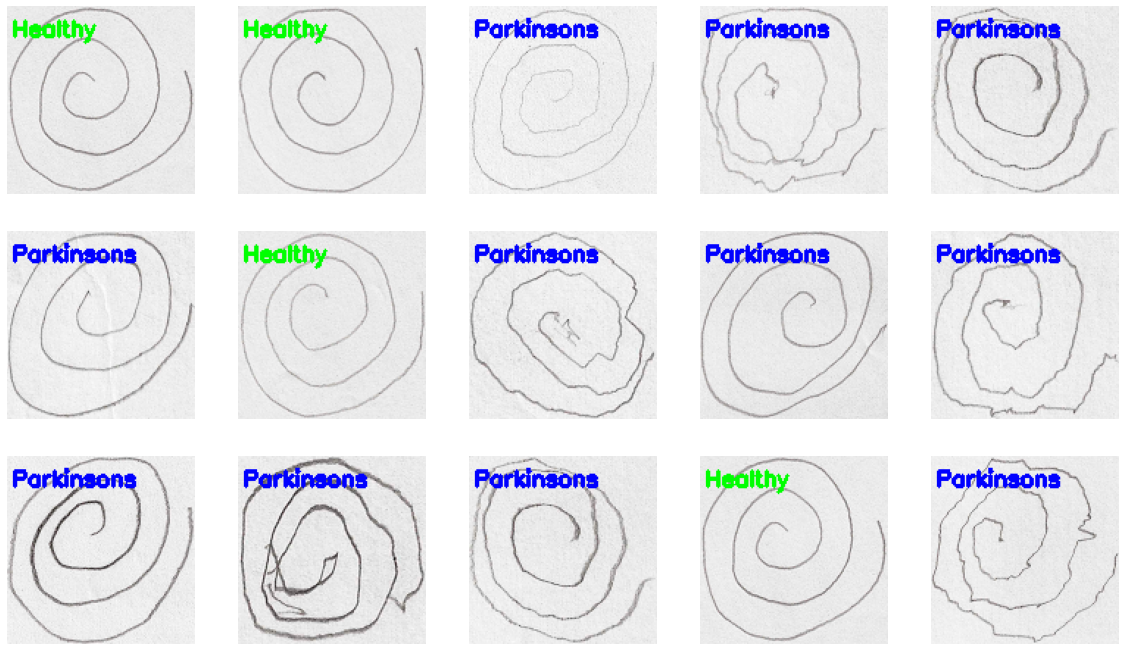

In [ ]:
testingPath = os.path.sep.join(["/content/spiral/", "testing"])
test_prediction(spiralModels['Rf']['classifier'], testingPath)

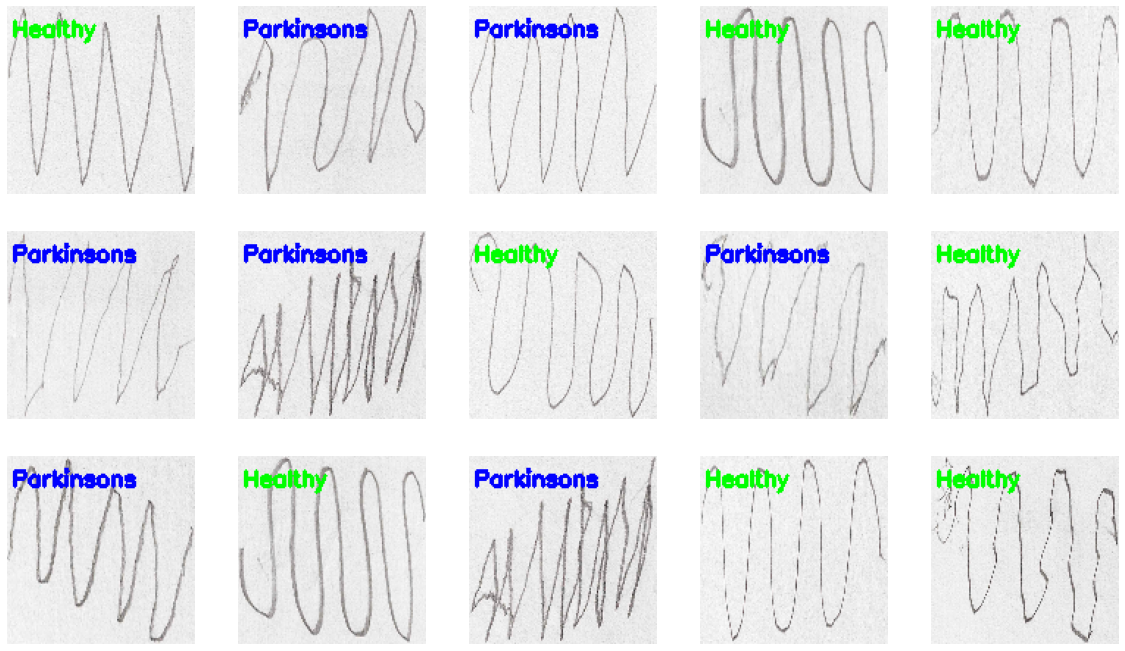

In [ ]:
testingPath = os.path.sep.join(["/content/wave", "testing"])
test_prediction(waveModels['Rf']['classifier'], testingPath)

# Attempt 7

Use OpenCV for data augmentation storing it one file along with manual label assignment

In [ ]:
for i in range(2):
    !echo '{"username":"vibertexyt","key":"c0d8eb6afe698fbdf81a814c150a3f20"}' > /root/.kaggle/kaggle.json
    !kaggle datasets download -d kmader/parkinsons-drawings

In [ ]:
!unzip /content/parkinsons-drawings.zip

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow import keras
from keras import Sequential
import PIL
import PIL.Image
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

import cv2 as cv
from google.colab.patches import cv2_imshow
print(cv.__version__)

4.1.2


In [ ]:
train_dir = "/content/wave/training" 
train_output_dir = "./resize_image/train"
BATCH_SIZE = 32
img_height = 128
img_width = 73
EPOCHS = 100

In [ ]:
!mkdir resize_image
!mkdir resize_image/train
!mkdir resize_image/train/healthy
!mkdir resize_image/train/parkinson

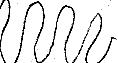

(63, 118)

In [ ]:
# def imageModification(img_path):

#     img = cv.imread(img_path)
#     grayImage = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#     (thresh, blackAndWhiteImage) = cv.threshold(grayImage, 127, 255, cv.THRESH_BINARY)
#     cv.imshow(blackAndWhiteImage)

# imageModification("/content/spiral/testing/parkinson/V01PE01.png")
 
# cv2.imshow('Black white image', blackAndWhiteImage)




# Read the image
img = cv.imread("/content/wave/testing/parkinson/V01PO01.png")
#Convert it to gray scale
grayImage = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#Binary black and white
(thresh, blackAndWhiteImage) = cv.threshold(grayImage, 200, 255, cv.THRESH_BINARY)
#Set the image to the black and white image
img = blackAndWhiteImage
# resize image
img = cv.resize(img, (img_height,img_width))
#Zoom/Crop
# cropSize =5
crop_img = img[5:68,5:123]
img = crop_img
cv2_imshow(img)
img.shape
img

# crop_img = img[y:y+h, x:x+w]
# cv2.imshow("cropped", crop_img)
# for image in os.listdir(os.path.join(train_dir, "healthy")):
#     img_path = os.path.join(train_dir, "healthy", image)
#     img = cv.imread(img_path)
#     img = img.convert('RGB')
#     img = img.resize((img_height, img_width))
#     img.save(os.path.join(train_output_dir, "healthy", image))

# # Resize the data images that have parkinson
# for image in os.listdir(os.path.join(train_dir, "parkinson")):
#     img_path = os.path.join(train_dir, "parkinson", image)
#     img = PIL.Image.open(img  _path)
#     img = img.convert('RGB')
#     img = img.resize((img_height, img_width))
    
#     img.save(os.path.join(train_output_dir, "parkinson", image))

4.1.2


# Attempt 6

Make the images smaller due to the realisation of much white space for wave

Plan Completed: ✔

Model Works: ✖

In [ ]:
for i in range(2):
    !echo '{"username":"vibertexyt","key":"c0d8eb6afe698fbdf81a814c150a3f20"}' > /root/.kaggle/kaggle.json
    !kaggle datasets download -d kmader/parkinsons-drawings

/bin/bash: /root/.kaggle/kaggle.json: No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
 99% 41.0M/41.4M [00:01<00:00, 19.9MB/s]
100% 41.4M/41.4M [00:01<00:00, 31.8MB/s]


In [ ]:
!unzip /content/parkinsons-drawings.zip

Archive:  /content/parkinsons-drawings.zip
  inflating: drawings/spiral/testing/healthy/V01HE01.png  
  inflating: drawings/spiral/testing/healthy/V02HE01.png  
  inflating: drawings/spiral/testing/healthy/V03HE1.png  
  inflating: drawings/spiral/testing/healthy/V04HE01.png  
  inflating: drawings/spiral/testing/healthy/V05HE01.png  
  inflating: drawings/spiral/testing/healthy/V06HE01.png  
  inflating: drawings/spiral/testing/healthy/V07HE01.png  
  inflating: drawings/spiral/testing/healthy/V08HE01.png  
  inflating: drawings/spiral/testing/healthy/V09HE01.png  
  inflating: drawings/spiral/testing/healthy/V10HE01.png  
  inflating: drawings/spiral/testing/healthy/V11HE01.png  
  inflating: drawings/spiral/testing/healthy/V55HE12.png  
  inflating: drawings/spiral/testing/healthy/V55HE13.png  
  inflating: drawings/spiral/testing/healthy/V55HE14.png  
  inflating: drawings/spiral/testing/healthy/V55HE15.png  
  inflating: drawings/spiral/testing/parkinson/V01PE01.png  
  inflating:

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow import keras
from keras import Sequential
import PIL
import PIL.Image
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

In [ ]:
train_dir = "/content/wave/training" 
train_output_dir = "./resize_image/train"
BATCH_SIZE = 32
img_height = 128
img_width = 73
EPOCHS = 100

In [ ]:
!mkdir resize_image
!mkdir resize_image/train
!mkdir resize_image/train/healthy
!mkdir resize_image/train/parkinson

In [ ]:
# Resize the data images that are health
for image in os.listdir(os.path.join(train_dir, "healthy")):
    img_path = os.path.join(train_dir, "healthy", image)
    img = PIL.Image.open(img_path)
    img = img.convert('RGB')
    img = img.resize((img_height, img_width))
    img.save(os.path.join(train_output_dir, "healthy", image))

# Resize the data images that have parkinson
for image in os.listdir(os.path.join(train_dir, "parkinson")):
    img_path = os.path.join(train_dir, "parkinson", image)
    img = PIL.Image.open(img_path)
    img = img.convert('RGB')
    img = img.resize((img_height, img_width))
    
    img.save(os.path.join(train_output_dir, "parkinson", image))

In [ ]:
test_dir = "/content/wave/testing" # Where the data is coming from
test_output_dir = "./resize_image/test"

In [ ]:
!mkdir resize_image/test
!mkdir resize_image/test/healthy
!mkdir resize_image/test/parkinson

In [ ]:
for image in os.listdir(os.path.join(test_dir, "healthy")):
    img_path = os.path.join(test_dir, "healthy", image)
    img = PIL.Image.open(img_path)
    img = img.convert('RGB')
    img = img.resize((img_height, img_width))
    img.save(os.path.join(test_output_dir, "healthy", image))

# Resize the data images that don't have masks
for image in os.listdir(os.path.join(test_dir, "parkinson")):
    img_path = os.path.join(test_dir, "parkinson", image)
    img = PIL.Image.open(img_path)
    img = img.convert('RGB')
    img = img.resize((img_height, img_width))
    img.save(os.path.join(test_output_dir, "parkinson", image))

In [ ]:
from PIL import Image
import glob
image_list = []
for filename in glob.glob('/content/resize_image/train/healthy/*.png'):
    im = Image.open(filename)
    image_list.append(im)
for filename in glob.glob('/content/resize_image/train/parkinson/*.png'):
    im = Image.open(filename)
    image_list.append(im)
for filename in glob.glob('/content/resize_image/test/healthy/*.png'):
    im = Image.open(filename)
    image_list.append(im)
for filename in glob.glob('/content/resize_image/test/parkinson/*.png'):
    im = Image.open(filename)
    image_list.append(im)
image_list

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x73 at 0x7FA8201EA150>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x73 at 0x7FA8201EADD0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x73 at 0x7FA8201EAA90>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x73 at 0x7FA81DB56510>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x73 at 0x7FA81DB566D0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x73 at 0x7FA81DB56150>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x73 at 0x7FA81DB56250>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x73 at 0x7FA81DB56190>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x73 at 0x7FA81DB56210>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x73 at 0x7FA81DB56090>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x73 at 0x7FA81DB56350>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x73 at 0x7FA81DB56310>,
 <PIL.PngImagePlugin.PngImag

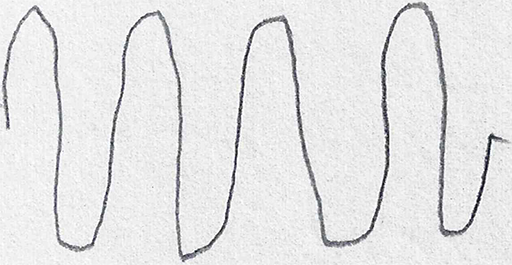

In [ ]:
img = PIL.Image.open("/content/wave/training/healthy/V01HO02.png")
img

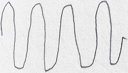

In [ ]:
img = PIL.Image.open("/content/resize_image/train/healthy/V01HO02.png")
img

In [ ]:
train_data_dir = '/content/resize_image/train'
validation_data_dir = '/content/resize_image/test'

# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rotation_range = 0,
      horizontal_flip=True,
      vertical_flip = False
      )

validation_datagen = ImageDataGenerator(
      rotation_range = 0,
      horizontal_flip=True,
      vertical_flip = False
)

# Set the Batch Size according to your system.
train_batchsize = 2000
val_batchsize = 1000

#Class Mode Binary

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        color_mode="grayscale",
        target_size=(img_height, img_width),
        batch_size=train_batchsize,
        class_mode='binary')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        color_mode="grayscale",
        target_size=(img_height, img_width),
        batch_size=val_batchsize,
        class_mode='binary',
        shuffle=False)

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [ ]:
print(train_generator.class_indices, 
      validation_generator.class_indices)

{'healthy': 0, 'parkinson': 1} {'healthy': 0, 'parkinson': 1}


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

import tensorflow
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers.advanced_activations import Softmax
from tensorflow.keras import Input
import numpy as np

BATCH_SIZE = 16
EPOCHS = 50

INIT_DROPOUT_RATE = 0.8
NUM_CLASSES=2
from keras.regularizers import l2
myModel = tensorflow.keras.Sequential()
myModel.add(Input(shape=(img_height, img_width, 1)))
myModel.add(Conv2D(100, (3, 3)))
myModel.add(Activation('relu'))
myModel.add(MaxPooling2D(pool_size=(2, 2), padding='same'))     
myModel.add(Conv2D(150, (2, 2)))
myModel.add(Activation('relu'))
myModel.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
myModel.add(Conv2D(200, (2, 2)))
myModel.add(Activation('relu'))
myModel.add(MaxPooling2D(pool_size=(2, 2)))
myModel.add(Activation('relu'))
myModel.add(MaxPooling2D(pool_size=(2, 2) ))
myModel.add(Activation('relu'))
myModel.add(MaxPooling2D(pool_size=(2, 2)))
myModel.add(Flatten())
myModel.add(Dense(5, activation='relu'))
myModel.add(Dense(20, activation='relu'))
myModel.add(Dense(50, activation='relu'))
myModel.add(Dense(1))
myModel.add(Activation('softmax'))

In [ ]:
myModel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_38 (ModuleWra (None, 126, 71, 100)      1000      
_________________________________________________________________
module_wrapper_39 (ModuleWra (None, 126, 71, 100)      0         
_________________________________________________________________
module_wrapper_40 (ModuleWra (None, 63, 36, 100)       0         
_________________________________________________________________
module_wrapper_41 (ModuleWra (None, 62, 35, 150)       60150     
_________________________________________________________________
module_wrapper_42 (ModuleWra (None, 62, 35, 150)       0         
_________________________________________________________________
module_wrapper_43 (ModuleWra (None, 31, 18, 150)       0         
_________________________________________________________________
module_wrapper_44 (ModuleWra (None, 30, 17, 200)      

In [ ]:
myModel.compile(loss='binary_crossentropy',
              optimizer = Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [ ]:
history = myModel.fit(train_generator, epochs=EPOCHS,batch_size=BATCH_SIZE, validation_data=validation_generator)

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.7897 - accuracy: 0.5000 - val_loss: 91.9852 - val_accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 247ms/step - loss: 90.8876 - accuracy: 0.5000 - val_loss: 0.7632 - val_accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 258ms/step - loss: 0.7569 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 251ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 248ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 249ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 253ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/50
1/1 [=====

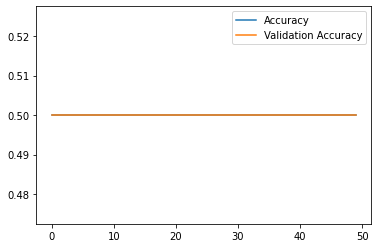

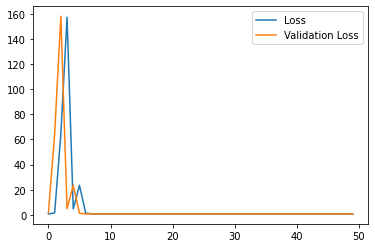

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


plt.plot(acc, label="Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend()
plt.show()


plt.plot(loss, label="Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.show()

In [ ]:
predictions = myModel.predict(train_generator)

In [ ]:
predictions

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

# Attempt 5
Copy Notebook using DNNs

Plan Completed: ✔

Model Works: ✖

In [ ]:
for i in range(2):
    !echo '{"username":"vibertexyt","key":"c0d8eb6afe698fbdf81a814c150a3f20"}' > /root/.kaggle/kaggle.json
    !kaggle datasets download -d kmader/parkinsons-drawings

parkinsons-drawings.zip: Skipping, found more recently modified local copy (use --force to force download)
parkinsons-drawings.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/parkinsons-drawings.zip

Archive:  /content/parkinsons-drawings.zip
replace drawings/spiral/testing/healthy/V01HE01.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow import keras
from keras import Sequential
import PIL
import PIL.Image
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import os
import numpy as np
import pandas as pd

from keras.layers import *
from keras import backend as K
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.models import Model,load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau,EarlyStopping

# from scipy.misc import toimage,imresize
from skimage import exposure
from PIL import Image
import cv2

In [ ]:
spirals_train_folder = '../content/spiral/training'
spirals_val_folder = '../content/spiral/testing'

In [ ]:
batch_size = 24
epochs = 100

In [ ]:
# histogram equalizer
def eqz_plz(img):
    return exposure.equalize_hist(img)


spiral_datagen = ImageDataGenerator(rotation_range=360, # they're spirals.
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    brightness_range=(0.5,1.5),
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    preprocessing_function=eqz_plz,
                                    vertical_flip=True)


In [ ]:
spiral_train_generator = spiral_datagen.flow_from_directory(directory=os.path.abspath(spirals_train_folder),
                                                            target_size=(256, 256),
                                                            color_mode="grayscale",
                                                            batch_size=batch_size,
                                                            class_mode="binary",
                                                            shuffle=True,
                                                            seed=666)

spiral_val_generator = spiral_datagen.flow_from_directory(directory=os.path.abspath(spirals_val_folder),
                                                            target_size=(256, 256),
                                                            color_mode="grayscale",
                                                            batch_size=batch_size,
                                                            class_mode="binary",
                                                            shuffle=True,
                                                            seed=710)

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss',patience=12,min_lr=1e-9,verbose=1)
early_stop = EarlyStopping(monitor='val_loss',patience=16,verbose=1)

NameError: ignored

In [ ]:
K.clear_session()

def nopamine_model(mode):
    if (mode == 'spirals') or (mode == 'spiral'):
        input_layer = Input(shape=(256,256,1),name=f'{mode}_input_layer')
    elif (mode == 'waves') or (mode == 'wave'):
        input_layer = Input(shape=(256,512,1),name=f'{mode}_input_layer')

    m1 = Conv2D(256,(5,5),dilation_rate=4,kernel_initializer='glorot_normal',kernel_regularizer=l2(0.001),activation='relu',padding='same')(input_layer)
    p1 = MaxPool2D((9,9),strides=3)(m1)
    m2 = Conv2D(128,(5,5),dilation_rate=2,kernel_initializer='glorot_normal',kernel_regularizer=l2(0.001),activation='relu',padding='same')(p1)
    p2 = MaxPool2D((7,7),strides=3)(m2)
    m3 = Conv2D(64,(3,3),kernel_initializer='glorot_normal',kernel_regularizer=l2(0.001),activation='relu',padding='same')(p2)
    p3 = MaxPool2D((5,5),strides=2)(m3)
    g1=Dropout(0.2)(p3)
    f1 = Flatten()(g1)
    d1 = Dense(666,activation='relu')(f1)
    g2=Dropout(0.5)(d1)
    d2 = Dense(1,activation='sigmoid')(g2)
    

    
    this_model = Model(input_layer,d2)
    this_model.summary()
    return this_model

NameError: ignored

In [ ]:
spiral_model = nopamine_model(mode='spirals') # early stopping epoch 89: val_loss 0.4796, val_acc 0.8274
spiral_model.compile(optimizer=Adam(lr=3.15e-5), loss='binary_crossentropy', metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
spirals_input_layer (InputLa [(None, 256, 256, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 256)     6656      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 83, 83, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 83, 83, 128)       819328    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0     

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history=spiral_model.fit_generator(spiral_train_generator,
                           validation_data=spiral_val_generator,
                           epochs=EPOCHS,
                           steps_per_epoch=(2000//batch_size),
                           validation_steps=(800//batch_size),
                           callbacks=[reduce_lr,early_stop],
                           verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


Epoch 1/50
83/83 [==============================] - 4s 32ms/step - loss: 0.9531 - accuracy: 0.5417 - val_loss: 0.9483 - val_accuracy: 0.6667


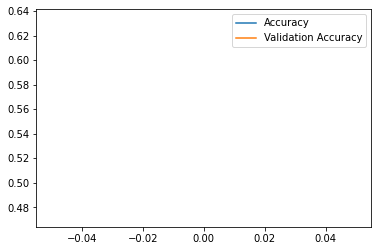

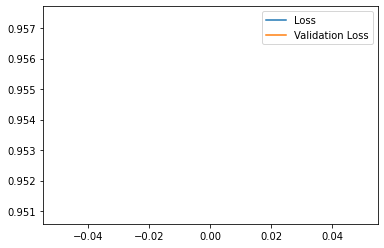

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


plt.plot(acc, label="Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend()
plt.show()


plt.plot(loss, label="Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.show()

#Attempt 4
Resize Images then use keras data augmentation 

Plan Completed: ✔

Model Works: ✖

In [ ]:
for i in range(2):
    !echo '{"username":"vibertexyt","key":"c0d8eb6afe698fbdf81a814c150a3f20"}' > /root/.kaggle/kaggle.json
    !kaggle datasets download -d kmader/parkinsons-drawings

/bin/bash: /root/.kaggle/kaggle.json: No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
 99% 41.0M/41.4M [00:01<00:00, 15.1MB/s]
100% 41.4M/41.4M [00:01<00:00, 24.5MB/s]


In [ ]:
!unzip /content/parkinsons-drawings.zip

Archive:  /content/parkinsons-drawings.zip
  inflating: drawings/spiral/testing/healthy/V01HE01.png  
  inflating: drawings/spiral/testing/healthy/V02HE01.png  
  inflating: drawings/spiral/testing/healthy/V03HE1.png  
  inflating: drawings/spiral/testing/healthy/V04HE01.png  
  inflating: drawings/spiral/testing/healthy/V05HE01.png  
  inflating: drawings/spiral/testing/healthy/V06HE01.png  
  inflating: drawings/spiral/testing/healthy/V07HE01.png  
  inflating: drawings/spiral/testing/healthy/V08HE01.png  
  inflating: drawings/spiral/testing/healthy/V09HE01.png  
  inflating: drawings/spiral/testing/healthy/V10HE01.png  
  inflating: drawings/spiral/testing/healthy/V11HE01.png  
  inflating: drawings/spiral/testing/healthy/V55HE12.png  
  inflating: drawings/spiral/testing/healthy/V55HE13.png  
  inflating: drawings/spiral/testing/healthy/V55HE14.png  
  inflating: drawings/spiral/testing/healthy/V55HE15.png  
  inflating: drawings/spiral/testing/parkinson/V01PE01.png  
  inflating:

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow import keras
from keras import Sequential
import PIL
import PIL.Image
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

In [ ]:
train_dir = "/content/wave/training" 
train_output_dir = "./resize_image/train"
BATCH_SIZE = 32
img_height = 256
img_width = 256
EPOCHS = 100

In [ ]:
!mkdir resize_image
!mkdir resize_image/train
!mkdir resize_image/train/healthy
!mkdir resize_image/train/parkinson

In [ ]:
# Resize the data images that are health
for image in os.listdir(os.path.join(train_dir, "healthy")):
    img_path = os.path.join(train_dir, "healthy", image)
    img = PIL.Image.open(img_path)
    img = img.convert('RGB')
    img = img.resize((img_height, img_width))
    img.save(os.path.join(train_output_dir, "healthy", image))

# Resize the data images that have parkinson
for image in os.listdir(os.path.join(train_dir, "parkinson")):
    img_path = os.path.join(train_dir, "parkinson", image)
    img = PIL.Image.open(img_path)
    img = img.convert('RGB')
    img = img.resize((img_height, img_width))
    img.save(os.path.join(train_output_dir, "parkinson", image))

In [ ]:
test_dir = "/content/wave/testing" # Where the data is coming from
test_output_dir = "./resize_image/test"

In [ ]:
!mkdir resize_image/test
!mkdir resize_image/test/healthy
!mkdir resize_image/test/parkinson

In [ ]:
for image in os.listdir(os.path.join(test_dir, "healthy")):
    img_path = os.path.join(test_dir, "healthy", image)
    img = PIL.Image.open(img_path)
    img = img.convert('RGB')
    img = img.resize((img_height, img_width))
    img.save(os.path.join(test_output_dir, "healthy", image))

# Resize the data images that don't have masks
for image in os.listdir(os.path.join(test_dir, "parkinson")):
    img_path = os.path.join(test_dir, "parkinson", image)
    img = PIL.Image.open(img_path)
    img = img.convert('RGB')
    img = img.resize((img_height, img_width))
    img.save(os.path.join(test_output_dir, "parkinson", image))

In [ ]:
from PIL import Image
import glob
image_list = []
for filename in glob.glob('/content/resize_image/train/healthy/*.png'):
    im = Image.open(filename)
    image_list.append(im)
for filename in glob.glob('/content/resize_image/train/parkinson/*.png'):
    im = Image.open(filename)
    image_list.append(im)
for filename in glob.glob('/content/resize_image/test/healthy/*.png'):
    im = Image.open(filename)
    image_list.append(im)
for filename in glob.glob('/content/resize_image/test/parkinson/*.png'):
    im = Image.open(filename)
    image_list.append(im)
image_list

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7F9379054550>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7F93790544D0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7F93790545D0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7F9379054650>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7F93790546D0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7F9379054790>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7F93790547D0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7F9379054890>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7F9379054910>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7F9379054750>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7F9379054A10>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7F93790549D0>,
 <PIL.PngImagePl

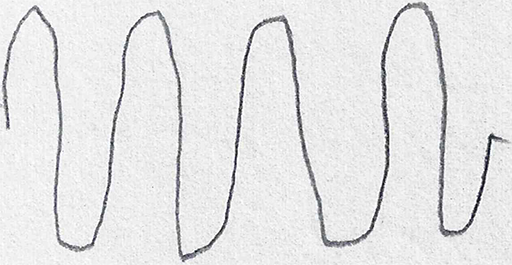

In [ ]:
img = PIL.Image.open("/content/wave/training/healthy/V01HO02.png")
img

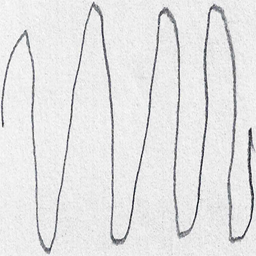

In [ ]:
img = PIL.Image.open("/content/resize_image/train/healthy/V01HO03.png")
img

In [ ]:
train_data_dir = '/content/resize_image/train'
validation_data_dir = '/content/resize_image/test'

# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rotation_range = 0,
      horizontal_flip=True,
      vertical_flip = False
      )

validation_datagen = ImageDataGenerator(
      rotation_range = 0,
      horizontal_flip=True,
      vertical_flip = False
)

# Set the Batch Size according to your system.
train_batchsize = 2000
val_batchsize = 1000

#Class Mode Binary

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        color_mode="grayscale",
        target_size=(256, 256),
        batch_size=train_batchsize,
        class_mode='binary')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        color_mode="grayscale",
        target_size=(256, 256),
        batch_size=val_batchsize,
        class_mode='binary',
        shuffle=False)

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [ ]:
print(train_generator.class_indices, 
      validation_generator.class_indices)

{'healthy': 0, 'parkinson': 1} {'healthy': 0, 'parkinson': 1}


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

import tensorflow
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers.advanced_activations import Softmax
from tensorflow.keras import Input
import numpy as np

BATCH_SIZE = 16
EPOCHS = 50

INIT_DROPOUT_RATE = 0.8
NUM_CLASSES=2
from keras.regularizers import l2
myModel = tensorflow.keras.Sequential()
myModel.add(Input(shape=(256, 256, 1)))
myModel.add(Conv2D(100, (3, 3)))
myModel.add(Activation('relu'))
myModel.add(MaxPooling2D(pool_size=(2, 2), padding='same'))     
myModel.add(Conv2D(150, (2, 2)))
myModel.add(Activation('relu'))
myModel.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
myModel.add(Conv2D(200, (2, 2)))
myModel.add(Activation('relu'))
myModel.add(MaxPooling2D(pool_size=(2, 2)))
myModel.add(Activation('relu'))
myModel.add(MaxPooling2D(pool_size=(2, 2) ))
myModel.add(Activation('relu'))
myModel.add(MaxPooling2D(pool_size=(2, 2)))
myModel.add(Flatten())
myModel.add(Dense(5, activation='relu'))
myModel.add(Dense(20, activation='relu'))
myModel.add(Dense(50, activation='relu'))
myModel.add(Dense(1))
myModel.add(Activation('softmax'))

In [ ]:
myModel.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_95 (ModuleWra (None, 254, 254, 100)     1000      
_________________________________________________________________
module_wrapper_96 (ModuleWra (None, 254, 254, 100)     0         
_________________________________________________________________
module_wrapper_97 (ModuleWra (None, 127, 127, 100)     0         
_________________________________________________________________
module_wrapper_98 (ModuleWra (None, 126, 126, 150)     60150     
_________________________________________________________________
module_wrapper_99 (ModuleWra (None, 126, 126, 150)     0         
_________________________________________________________________
module_wrapper_100 (ModuleWr (None, 63, 63, 150)       0         
_________________________________________________________________
module_wrapper_101 (ModuleWr (None, 62, 62, 200)      

In [ ]:
myModel.compile(loss='binary_crossentropy',
              optimizer = Adam(learning_rate=0.05),
              metrics=['accuracy'])

In [ ]:
history = myModel.fit(train_generator, epochs=EPOCHS,batch_size=BATCH_SIZE, validation_data=validation_generator)

Epoch 1/50
1/1 [==============================] - 40s 40s/step - loss: 0.9210 - accuracy: 0.5000 - val_loss: 93925.6172 - val_accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 1s 1s/step - loss: 93559.1797 - accuracy: 0.5000 - val_loss: 1427.7543 - val_accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 1427.5088 - accuracy: 0.5000 - val_loss: 299.3853 - val_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 1s 1s/step - loss: 297.2951 - accuracy: 0.5000 - val_loss: 2352.8206 - val_accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 1s 1s/step - loss: 2347.9685 - accuracy: 0.5000 - val_loss: 2530.3972 - val_accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 1s 1s/step - loss: 2521.5205 - accuracy: 0.5000 - val_loss: 375.7921 - val_accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 1s 1s/step - loss: 374.6337 - accuracy: 0.5000 - val_loss: 5.8313 - val_accuracy: 0.5000
Epoch

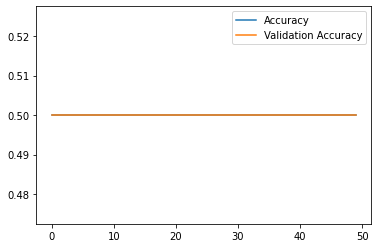

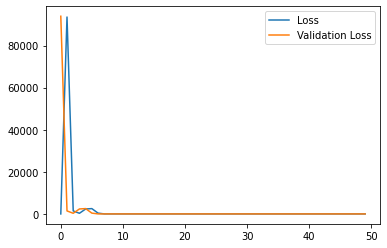

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


plt.plot(acc, label="Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend()
plt.show()


plt.plot(loss, label="Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.show()

In [ ]:
image_list = []
for filename in glob.glob('/content/resize_image/train/parkinson/*.png'):
    im = Image.open(filename)
    image_list.append(im)

#Some of these images have Alpha values, you can see at image mode=RGB where some have image mode=RGBA

for filename in glob.glob('/content/resize_image/train/healthy/*.png'):
    im = Image.open(filename)
    image_list.append(im)

image_list

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x73 at 0x7F25F1ABCA50>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x73 at 0x7F25F1ABC610>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x73 at 0x7F25F1ABC350>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x73 at 0x7F25F1ABC790>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x73 at 0x7F25F1ABC490>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x73 at 0x7F25F1ABC5D0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x73 at 0x7F25F1ABC250>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x73 at 0x7F25F1ABCB90>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x73 at 0x7F25F1ABCB10>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x73 at 0x7F25F1ABCA10>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x73 at 0x7F25F1ABC890>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x73 at 0x7F25F1ABC110>,
 <PIL.PngImagePlugin.PngImag

In [ ]:
myModel.predict(image_list)

ValueError: ignored

#Attempt 3
Attempting to make the data the same size by resizing them

Plan Completed: ✔

Model Works: ✖


In [ ]:
for i in range(2):
    !echo '{"username":"vibertexyt","key":"c0d8eb6afe698fbdf81a814c150a3f20"}' > /root/.kaggle/kaggle.json
    !kaggle datasets download -d kmader/parkinsons-drawings

 82% 34.0M/41.4M [00:00<00:00, 171MB/s]
100% 41.4M/41.4M [00:00<00:00, 163MB/s]
parkinsons-drawings.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/parkinsons-drawings.zip

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow import keras
from keras import Sequential
import PIL
import PIL.Image
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

In [ ]:
data_dir = "/content/wave/training"
output_dir = "./resize_image"
BATCH_SIZE = 32
img_height = 256
img_width = 256
EPOCHS = 100

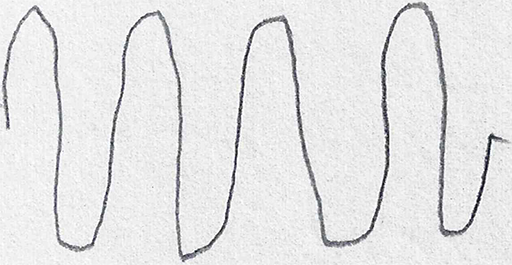

In [ ]:
img = PIL.Image.open("/content/wave/training/healthy/V01HO02.png")
img

In [ ]:
!mkdir resize_image
!mkdir resize_image/healthy
!mkdir resize_image/parkinson

In [ ]:
# Resize the data images that are health
for image in os.listdir(os.path.join(data_dir, "healthy")):
    img_path = os.path.join(data_dir, "healthy", image)
    img = PIL.Image.open(img_path)
    img = img.convert('RGB')
    img = img.resize((img_height, img_width))
    img.save(os.path.join(output_dir, "healthy", image))

In [ ]:
# Resize the data images that don't have masks
for image in os.listdir(os.path.join(data_dir, "parkinson")):
    img_path = os.path.join(data_dir, "parkinson", image)
    img = PIL.Image.open(img_path)
    img = img.convert('RGB')
    img = img.resize((img_height, img_width))
    img.save(os.path.join(output_dir, "parkinson", image))

In [ ]:
from PIL import Image
import glob
image_list = []
for filename in glob.glob('/content/resize_image/healthy/*.png'):
    im = Image.open(filename)
    image_list.append(im)

image_list

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F4B88072790>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F4B880890D0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F4B9C567CD0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F4B880721D0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F4B88072710>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F4B88072BD0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F4B88072050>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F4B88072E90>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F4B88072650>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F4B88072690>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F4B88072390>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F4B88072210>,
 <PIL.PngImagePl

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  output_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode='binary',
  image_size=(img_height, img_width),
  batch_size=BATCH_SIZE)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  output_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode='binary',
  image_size=(img_height, img_width),
  batch_size=BATCH_SIZE)

Found 72 files belonging to 2 classes.
Using 58 files for training.
Found 72 files belonging to 2 classes.
Using 14 files for validation.


In [ ]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)


In [ ]:
model = tf.keras.Sequential(
    [normalization_layer,
     data_augmentation,
     layers.Conv2D(32, 7, activation="relu", padding="SAME", input_shape=(img_height, img_width, 3)),
     layers.MaxPool2D(),
     layers.Conv2D(64, 3, activation="relu", padding="SAME"),
     layers.MaxPool2D(),
     layers.Conv2D(128, 3, activation="relu", padding="SAME"),
     layers.MaxPool2D(),
     layers.Dropout(.2),
     layers.Flatten(),
     layers.Dense(256, activation="relu"),
     layers.Dense(1, activation="sigmoid")]
)

In [ ]:
model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])


In [ ]:
# Training model
history = model.fit(train_ds,
                 batch_size=BATCH_SIZE,
                 validation_data=test_ds,
                 epochs=EPOCHS)

Epoch 1/100
2/2 [==============================] - 0s 150ms/step - loss: 0.7043 - accuracy: 0.5172 - val_loss: 0.7089 - val_accuracy: 0.4286
Epoch 2/100
2/2 [==============================] - 0s 148ms/step - loss: 0.6940 - accuracy: 0.5172 - val_loss: 0.7045 - val_accuracy: 0.4286
Epoch 3/100
2/2 [==============================] - 0s 144ms/step - loss: 0.6939 - accuracy: 0.5172 - val_loss: 0.7003 - val_accuracy: 0.4286
Epoch 4/100
2/2 [==============================] - 0s 125ms/step - loss: 0.6926 - accuracy: 0.5172 - val_loss: 0.6992 - val_accuracy: 0.4286
Epoch 5/100
2/2 [==============================] - 0s 115ms/step - loss: 0.6929 - accuracy: 0.5172 - val_loss: 0.6970 - val_accuracy: 0.4286
Epoch 6/100
2/2 [==============================] - 0s 113ms/step - loss: 0.6927 - accuracy: 0.5172 - val_loss: 0.6963 - val_accuracy: 0.4286
Epoch 7/100
2/2 [==============================] - 0s 112ms/step - loss: 0.6927 - accuracy: 0.5172 - val_loss: 0.6959 - val_accuracy: 0.4286
Epoch 8/100
2

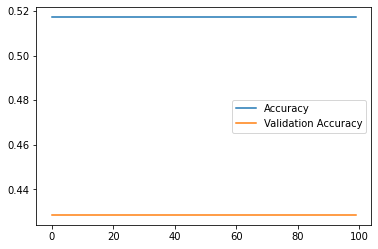

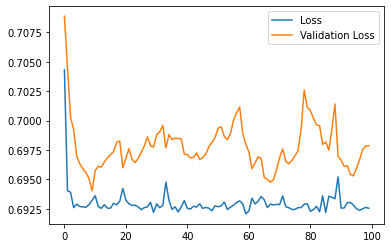

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


plt.plot(acc, label="Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend()
plt.show()


plt.plot(loss, label="Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.show()

# Attempt 2
Manually assigning labels using numpy

In [ ]:
#Data https://www.kaggle.com/kmader/parkinsons-drawings
for i in range(2):
    !echo '{"username":"vibertexyt","key":"c0d8eb6afe698fbdf81a814c150a3f20"}' > /root/.kaggle/kaggle.json
    !kaggle datasets download -d kmader/parkinsons-drawings

/bin/bash: /root/.kaggle/kaggle.json: No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
 75% 31.0M/41.4M [00:00<00:00, 138MB/s]
100% 41.4M/41.4M [00:00<00:00, 138MB/s]


In [ ]:
!unzip /content/parkinsons-drawings.zip

Archive:  /content/parkinsons-drawings.zip
  inflating: drawings/spiral/testing/healthy/V01HE01.png  
  inflating: drawings/spiral/testing/healthy/V02HE01.png  
  inflating: drawings/spiral/testing/healthy/V03HE1.png  
  inflating: drawings/spiral/testing/healthy/V04HE01.png  
  inflating: drawings/spiral/testing/healthy/V05HE01.png  
  inflating: drawings/spiral/testing/healthy/V06HE01.png  
  inflating: drawings/spiral/testing/healthy/V07HE01.png  
  inflating: drawings/spiral/testing/healthy/V08HE01.png  
  inflating: drawings/spiral/testing/healthy/V09HE01.png  
  inflating: drawings/spiral/testing/healthy/V10HE01.png  
  inflating: drawings/spiral/testing/healthy/V11HE01.png  
  inflating: drawings/spiral/testing/healthy/V55HE12.png  
  inflating: drawings/spiral/testing/healthy/V55HE13.png  
  inflating: drawings/spiral/testing/healthy/V55HE14.png  
  inflating: drawings/spiral/testing/healthy/V55HE15.png  
  inflating: drawings/spiral/testing/parkinson/V01PE01.png  
  inflating:

Check out
https://www.tensorflow.org/guide/ragged_tensor 
Manually reshape

In [ ]:
from PIL import Image
import glob
image_list = []
# Add all images to a list
for i,filename in enumerate(glob.glob('/content/spiral/training/healthy/*.png')):
    im = Image.open(filename)
    
    image_list.append(im)

In [ ]:
len(image_list)
import numpy as np


In [ ]:
label_list = np.zeros(36)

In [ ]:
#Do the same for the parkinson set
image_list = []
for filename in glob.glob('/content/spiral/training/parkinson/*.png'):
    im = Image.open(filename)
    image_list.append(im)

In [ ]:


#Some of these images have Alpha values, you can see at image mode=RGB where some have image mode=RGBA

for filename in glob.glob('/content/spiral/training/healthy/*.png'):
    im = Image.open(filename)
    image_list.append(im)

image_list

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7FF68EE76710>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7FF68EE76F50>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7FF68EE76310>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7FF68EDFB650>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7FF68EDFB6D0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7FF68EDFB7D0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7FF68EDFB850>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7FF68EDFB790>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7FF68EDFBB90>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7FF68EDFB610>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7FF68EDFBD10>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7FF68EDFBA10>,
 <PIL.PngImagePl

In [ ]:
from numpy import concatenate
# # zeros for now
new_labels= np.ones(36)
labels = concatenate((label_list,new_labels))

In [ ]:
labels = labels.astype(np.uint8)
labels


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=uint8)

In [ ]:
indeces = list(range(len(labels)))

In [ ]:
import random
random.shuffle(indeces)

In [ ]:
print(indeces)
print(len(indeces))

[52, 41, 53, 25, 15, 59, 67, 18, 48, 26, 54, 19, 35, 71, 9, 60, 14, 8, 70, 13, 47, 39, 40, 46, 28, 57, 29, 68, 2, 1, 12, 24, 23, 22, 51, 6, 21, 5, 7, 66, 4, 42, 10, 32, 43, 69, 38, 0, 61, 20, 50, 55, 31, 44, 62, 17, 16, 34, 63, 49, 58, 27, 65, 30, 36, 11, 3, 64, 37, 45, 33, 56]
72


In [ ]:
training_images = [image_list[i] for i in indeces]

In [ ]:
training_images = [image_list[i] for i in indeces]
training_labels = [labels[i] for i in indeces]
training_labels

[1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1]

In [ ]:
import cv2
from PIL import Image
from numpy import asarray

numpy_spiral = []

for filename in glob.glob('/content/spiral/training/healthy/*.png'):
    im = Image.open(filename)
    numpydata = asarray(im).astype('float32')
    numpydata.resize(256,256,3)
    print(numpydata.shape)
    numpy_spiral.append(numpydata)

for filename in glob.glob('/content/spiral/training/parkinson/*.png'):
    im = Image.open(filename)
    numpydata = asarray(im).astype('float32')
    numpydata.resize(256,256,3)
    print(numpydata.shape)
    numpy_spiral.append(numpydata)


(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 

In [ ]:
training_images = [numpy_spiral[i] for i in indeces]

In [ ]:
training_images = asarray(training_images)
training_labels =  asarray(training_labels)

In [ ]:
training_images.shape

(72, 256, 256, 3)

In [ ]:
training_labels.shape

(72,)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.optimizers import Adam

import tensorflow
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers.advanced_activations import Softmax
from tensorflow.keras import Input
import numpy as np

BATCH_SIZE = 16
EPOCHS = 50

INIT_DROPOUT_RATE = 0.8
NUM_CLASSES=2
from keras.regularizers import l2
myModel = tensorflow.keras.Sequential()
myModel.add(Input(shape=(256, 256, 3)))
myModel.add(Conv2D(100, (3, 3)))
myModel.add(Activation('relu'))
myModel.add(MaxPooling2D(pool_size=(2, 2), padding='same'))     
myModel.add(Conv2D(150, (2, 2)))
myModel.add(Activation('relu'))
myModel.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
myModel.add(Conv2D(200, (2, 2)))
myModel.add(Activation('relu'))
myModel.add(MaxPooling2D(pool_size=(2, 2)))
myModel.add(Activation('relu'))
myModel.add(MaxPooling2D(pool_size=(2, 2) ))
myModel.add(Activation('relu'))
myModel.add(MaxPooling2D(pool_size=(2, 2)))
myModel.add(Flatten())
myModel.add(Dense(5, activation='relu'))
myModel.add(Dense(20, activation='relu'))
myModel.add(Dense(50, activation='relu'))
myModel.add(Dense(1))
myModel.add(Activation('sigmoid'))
myModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 254, 254, 100)     2800      
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 254, 254, 100)     0         
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 127, 127, 100)     0         
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 126, 126, 150)     60150     
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 126, 126, 150)     0         
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 63, 63, 150)       0         
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 62, 62, 200)       1

In [ ]:
myModel.compile(loss='binary_crossentropy',
              optimizer = Adam(learning_rate=0.05),
              metrics=['acc'])

In [ ]:
training_labels

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1], dtype=uint8)

In [ ]:
# history = myModel.fit(training_images,training_labels, epochs=EPOCHS,batch_size=BATCH_SIZE)
history = myModel.fit(x=training_images, y=training_labels, epochs=EPOCHS,batch_size=BATCH_SIZE)

Epoch 1/50
5/5 [==============================] - 34s 302ms/step - loss: 84171.4062 - acc: 0.4167
Epoch 2/50
5/5 [==============================] - 0s 82ms/step - loss: 3728.2686 - acc: 0.5278
Epoch 3/50
5/5 [==============================] - 0s 83ms/step - loss: 0.7100 - acc: 0.3333
Epoch 4/50
5/5 [==============================] - 0s 82ms/step - loss: 0.6935 - acc: 0.5278
Epoch 5/50
5/5 [==============================] - 0s 80ms/step - loss: 0.6963 - acc: 0.5000
Epoch 6/50
5/5 [==============================] - 0s 85ms/step - loss: 0.6955 - acc: 0.5000
Epoch 7/50
5/5 [==============================] - 0s 79ms/step - loss: 0.6936 - acc: 0.5000
Epoch 8/50
5/5 [==============================] - 0s 81ms/step - loss: 0.6932 - acc: 0.5556
Epoch 9/50
5/5 [==============================] - 0s 81ms/step - loss: 0.6939 - acc: 0.5000
Epoch 10/50
5/5 [==============================] - 0s 81ms/step - loss: 0.6942 - acc: 0.5000
Epoch 11/50
5/5 [==============================] - 0s 81ms/step - loss

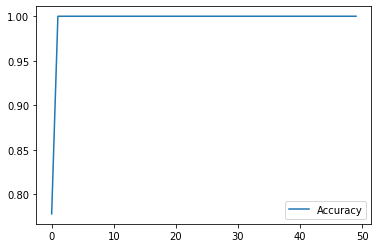

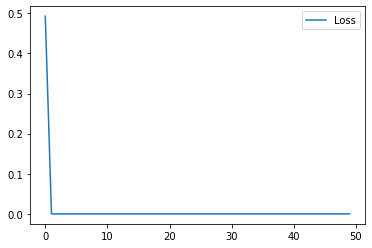

In [ ]:
acc = history.history['acc']
# val_acc = history.history['val_acc']
loss = history.history['loss']
# val_loss = history.history['val_loss']

plt.plot(acc, label="Accuracy")
# plt.plot(val_acc, label="Validation Accuracy")
plt.legend()
plt.show()

plt.plot(loss, label="Loss")
# plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.show()

In [ ]:
myModel.predict(training_images)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
history = myModel.fit(train_generator, epochs=EPOCHS,batch_size=BATCH_SIZE, validation_data=validation_generator)

In [ ]:
train_data_dir = '/content/spiral/training'
validation_data_dir = '/content/spiral/testing'

# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rotation_range = 0,
      horizontal_flip=True,
      vertical_flip = False
      )

validation_datagen = ImageDataGenerator(
      rotation_range = 0,
      horizontal_flip=True,
      vertical_flip = False
)

# Set the Batch Size according to your system.
train_batchsize = 2000
val_batchsize = 1000

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(256, 256),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(256, 256),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

In [ ]:
import matplotlib.pyplot as plt
# (train_generator[0][0][12]*255).astype(np.uint8)
plt.imshow((train_generator[0][0][12]*257).astype(np.uint8))
plt.show()

In [ ]:
((train_generator[0][0]).astype(np.uint8))


In [ ]:
(train_generator[0][0][30]).astype(np.uint8)

In [ ]:
len(train_generator)

In [ ]:
print(train_generator.class_indices, 
      validation_generator.class_indices)

In [ ]:
validation_generator.class_indices

# Attempt 1


In [ ]:

from os import walk

f = []
for (dirpath, dirnames, filenames) in walk("/content/spiral/training/healthy"):
    f.extend(filenames)
    break
print(len(f))

36


In [ ]:
f = []
for (dirpath, dirnames, filenames) in walk("/content/spiral/training/parkinson"):
    f.extend(filenames)
    break
print(len(f))

36


In [ ]:
f = []
for (dirpath, dirnames, filenames) in walk("/content/spiral/testing/healthy"):
    f.extend(filenames)
    break
print(len(f))

15


In [ ]:
f = []
for (dirpath, dirnames, filenames) in walk("/content/spiral/testing/parkinson"):
    f.extend(filenames)
    break
print(len(f))

15


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

import tensorflow
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers.advanced_activations import Softmax
from tensorflow.keras import Input
import numpy as np

In [ ]:
BATCH_SIZE = 16
EPOCHS = 50
# INIT_DROPOUT_RATE = 0.5
# MOMENTUM_RATE = 0.9
# INIT_LEARNING_RATE = 0.01
# L2_DECAY_RATE = 0.0005

In [ ]:
myModel.compile(loss='binary_crossentropy',
              optimizer = Adam(learning_rate=0.005),
              metrics=['acc'])

In [ ]:
train_generator.shuffle

True

In [ ]:
history = myModel.fit(train_generator, epochs=EPOCHS,batch_size=BATCH_SIZE)

Epoch 1/50


ValueError: ignored

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, label="Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend()
plt.show()

plt.plot(loss, label="Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.show()

In [ ]:
myModel.predict(train_generator)

In [ ]:
import tensorflow
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers.advanced_activations import Softmax
from tensorflow.keras import Input
import numpy as np

# model = ResNet50(weights='imagenet')


model = tensorflow.keras.Sequential()
model.add(Input(shape=(256, 256, 3)))
model.add(ResNet50(weights='imagenet', include_top=False))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))



# model = 
# model = layers.Dense(2, activation='softmax')(model)

model.compile(loss='binary_crossentropy',
              optimizer = Adam(learning_rate=0.01),
              metrics=['acc'])

model.summary()

In [ ]:
# model.build(input_tensor)
model.summary()

In [ ]:
history = model.fit(train_generator, epochs=EPOCHS,batch_size=BATCH_SIZE, validation_data=validation_generator)

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']


plt.plot(acc, label="Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend()
plt.show()


plt.plot(loss, label="Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.show()

In [ ]:
INIT_DROPOUT_RATE = 0.8
NUM_CLASSES=2
from keras.regularizers import l2
myModel = tensorflow.keras.Sequential()
myModel.add(Input(shape=(256, 256, 3)))
myModel.add(Conv2D(100, (3, 3)))
myModel.add(Activation('elu'))
myModel.add(MaxPooling2D(pool_size=(2, 2), padding='same'))     
myModel.add(Conv2D(150, (2, 2)))
myModel.add(Activation('elu'))
myModel.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
myModel.add(Conv2D(200, (2, 2)))
myModel.add(Activation('elu'))
myModel.add(MaxPooling2D(pool_size=(2, 2)))
myModel.add(Activation('elu'))
myModel.add(MaxPooling2D(pool_size=(2, 2) ))
myModel.add(Activation('elu'))
myModel.add(MaxPooling2D(pool_size=(2, 2)))
myModel.add(Flatten())
myModel.add(Dense(5, activation='softmax'))
myModel.add(Dense(20, activation='softmax'))
myModel.add(Dense(50, activation='softmax'))
myModel.add(Dense(NUM_CLASSES))
myModel.add(Activation('softmax'))

myModel.summary()

In [ ]:
myModel.compile(loss='binary_crossentropy',
              optimizer = Adam(learning_rate=0.01),
              metrics=['acc'])

In [ ]:

history = myModel.fit(train_generator, epochs=EPOCHS,batch_size=BATCH_SIZE, validation_data=validation_generator)

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']


plt.plot(acc, label="Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend()
plt.show()


plt.plot(loss, label="Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.show()

In [ ]:
next(validation_generator)[0][0]


In [ ]:
classifier.predict(next(validation_generator)[0])

In [ ]:
BATCH_SIZE = 16
EPOCHS = 50
INIT_DROPOUT_RATE = 0.8
MOMENTUM_RATE = 0.9
INIT_LEARNING_RATE = 0.01
L2_DECAY_RATE = 0.0005
NUM_CLASSES=2

In [ ]:
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer = Adam(learning_rate=0.01),
              metrics=['acc'])
history = model.fit(train_generator, epochs=EPOCHS,batch_size=BATCH_SIZE, validation_data=validation_generator)

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']


plt.plot(acc, label="Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend()
plt.show()


plt.plot(loss, label="Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.show()